# Clusterização com DBSCAN no Dataset "Moons"

## Introdução

O **DBSCAN (Density-Based Spatial Clustering of Applications with Noise)** é uma técnica de clusterização baseada na densidade. Ele é capaz de identificar clusters de formas arbitrárias e detectar outliers. Neste exemplo, aplicaremos o DBSCAN ao dataset **"Moons"**, que possui clusters em formato de meia-lua, ideal para avaliar a eficácia de algoritmos baseados em densidade.

---

## Dataset "Moons"

O dataset "Moons" é gerado sinteticamente e contém:
- **600 amostras** distribuídas em dois clusters em forma de meia-lua.
- 10% de **ruído** adicionado para dificultar a separação perfeita.

Este dataset é amplamente utilizado para avaliar algoritmos de clusterização que não assumem formas regulares.

---

## Objetivo

- Usar o **DBSCAN** para agrupar os dados em clusters.
- Comparar os clusters gerados com as **classes verdadeiras**.

---



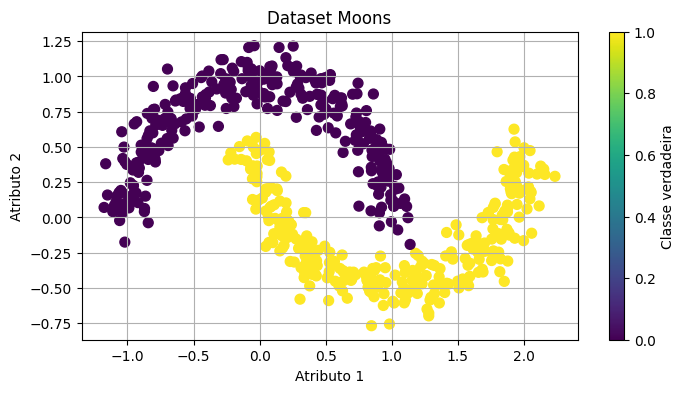

In [1]:
# Importar bibliotecas necessárias e plotar o dataset
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_moons

# Gerar o dataset "Moons"
X, y = make_moons(n_samples=600, noise=0.1, random_state=2)

# Plotar o dataset
plt.figure(figsize=(8, 4))
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='viridis', s=50)
plt.title("Dataset Moons")
plt.xlabel("Atributo 1")
plt.ylabel("Atributo 2")
plt.colorbar(label="Classe verdadeira")
plt.grid()
plt.show()


--- 
---
# Importar bibliotecas necessárias para o DBSCAN e pré-processamento


In [2]:
# Importar bibliotecas necessárias
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler

### Pré-processar os dados de entrada

In [3]:
# Padronizar os dados
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

## 2. Aplicar o DBSCAN

O **DBSCAN (Density-Based Spatial Clustering of Applications with Noise)** é configurado com os seguintes parâmetros principais:

- **`eps` $ \varepsilon $**:
  - Define o raio de busca ao redor de cada ponto.
  - Neste exemplo, usamos $ \varepsilon = 0.3 $, ou seja, o algoritmo considera pontos dentro de uma distância de 0.3 como vizinhos.

- **`min_samples` $\text{minPts} $**:
  - Número mínimo de pontos necessários para formar um cluster.
  - Para este exemplo, $\text{minPts} = 5 $, ou seja, pelo menos 5 pontos devem estar dentro do raio $ \varepsilon $ para que um ponto seja considerado um **Core Point**.


In [8]:
# Aplicar o DBSCAN
dbscan = DBSCAN(eps=0.2, min_samples=5)
clusters = dbscan.fit_predict(X_scaled)

## 3. Visualizar os Resultados
Clusters gerados pelo DBSCAN
- Cada cor no gráfico representa um cluster identificado pelo DBSCAN.
- Pontos marcados como -1 são considerados outliers (ruído).

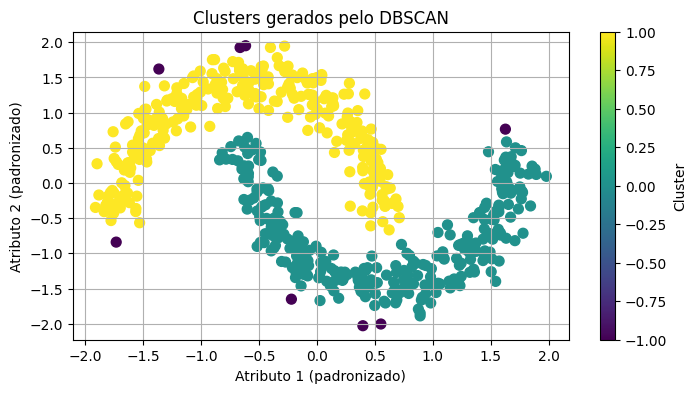

In [9]:
# Visualizar os clusters gerados pelo DBSCAN
plt.figure(figsize=(8, 4))
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=clusters, cmap='viridis', s=50)
plt.title("Clusters gerados pelo DBSCAN")
plt.xlabel("Atributo 1 (padronizado)")
plt.ylabel("Atributo 2 (padronizado)")
plt.colorbar(label="Cluster")
plt.grid()
plt.show()

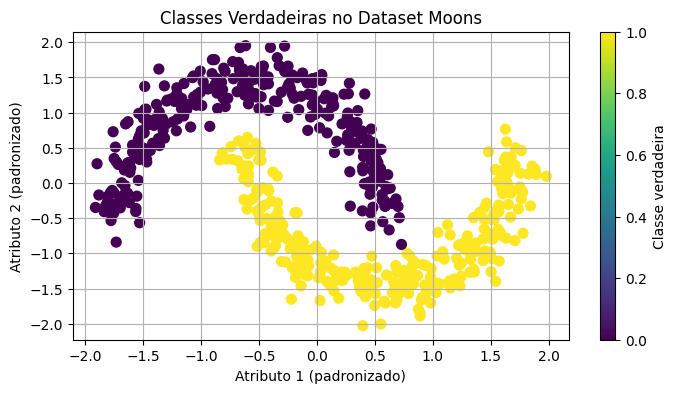

In [10]:
# Visualizar as classes verdadeiras para comparação
plt.figure(figsize=(8, 4))
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=y, cmap='viridis', s=50)
plt.title("Classes Verdadeiras no Dataset Moons")
plt.xlabel("Atributo 1 (padronizado)")
plt.ylabel("Atributo 2 (padronizado)")
plt.colorbar(label="Classe verdadeira")
plt.grid()
plt.show()